# Assigmnet 5

##### Pranisaa Charnparttaravanit st 

1. Load boston setting X as boston.data and y as boston.target

Attempt the grid search using polyregression + (linear, ridge, lasso, elastic net), and 

Does feature mechanisms on ridge/lasso/elastic helps here?

what is the optimal polynomial degree?  What does it mean?

why do you think the result is like this?

what is the value of lambdas, and what does it means?

In [7]:
 ! pip install -U scikit-learn

  Using cached scikit_learn-0.23.2-cp37-cp37m-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [38]:
# Load boston dataset from sklearn here
from sklearn.datasets import load_boston

boston = load_boston()
# boston.feature_names
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [11]:
type(boston)
# scaler = StandardScaler()
X = boston.data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = boston.target

import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import sklearn.model_selection as model_selection
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error,r2_score

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category = ConvergenceWarning,module = "sklearn")

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.3,random_state = 5)

# polyregression+linear
params_linear = {'polynomialfeatures__degree': np.arange(1, 10),
                 'linearregression__normalize': [True]}
linear = make_pipeline(PolynomialFeatures(), LinearRegression())

# polyregression+ridge
params_ridge = {'polynomialfeatures__degree': np.arange(1, 10),
                'ridge__alpha': np.logspace(-1,-4,4),
                 'ridge__normalize' : [True]}
ridge = make_pipeline(PolynomialFeatures(),Ridge())

# polyregression+lasso
params_lasso = {'polynomialfeatures__degree': np.arange(1, 10),
                'lasso__normalize': [True],
               'lasso__alpha': np.logspace(-1,-4,4)}
lasso = make_pipeline(PolynomialFeatures(),Lasso())

# polyregression +elastic net
params_elasticnet = {'polynomialfeatures__degree': np.arange(1, 10),
                'elasticnet__normalize': [True],
               'elasticnet__alpha': np.logspace(-1,-4,4)}
elasticnet = make_pipeline(PolynomialFeatures(),ElasticNet())


In [12]:
models=[linear, ridge,lasso,elasticnet]
params = [params_linear, params_ridge, params_lasso, params_elasticnet]
modelname = ['linearregression','ridge','lasso','elasticnet']

for ix, model in enumerate(models):
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state=42)
    print(model)
    grid = GridSearchCV(model, params[ix], cv=cv)
    
    #grid.fit will fit the model at each grid point
    grid.fit(X_train, y_train)

    #print the best parameters
    print("Best params: ", grid.best_params_)

    #make prediction
    model = grid.best_estimator_
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #print the stats
    print("Coefficients: ", model.named_steps[modelname[ix]].coef_)
    print(f"r^2 = {r2_score(y_test, y_pred):.3f}")
    print(f"MSE = {mean_squared_error(y_test, y_pred):.2f}")
    n, p = X.shape[0], X.shape[1]
    adjusted_rsqrt = 1-(1-r2_score(y_test, y_pred))*(n-1)/(n-p-1)
    print(f"adjusted $r^2$ = {adjusted_rsqrt:.3f}")

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
Best params:  {'linearregression__normalize': True, 'polynomialfeatures__degree': 1}
Coefficients:  [ 0.         -1.32750493  0.96447433 -0.17391979  0.19945597 -1.49757922
  2.83543215 -0.2962689  -2.80831532  2.76854145 -2.12866545 -2.11368262
  1.15569647 -3.29628098]
r^2 = 0.677
MSE = 30.70
adjusted $r^2$ = 0.669
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge())])
Best params:  {'polynomialfeatures__degree': 2, 'ridge__alpha': 0.01, 'ridge__normalize': True}
Coefficients:  [ 0.00000000e+00 -1.44816043e-01 -5.64496705e-02  3.98000454e-01
  4.38845564e-01 -8.51675780e-01  3.55010742e+00 -1.37778256e+00
 -1.86222774e+00  1.10837142e+00 -1.06506148e+00 -8.12821444e-01
  1.25327660e+00 -3.26288191e+00  1.63850840e-01  4.71665252e-01
 -1.16864891e-01  2.94839213e+00 -6.22042398e-01  3.06562044e-01
 -4.06958944e-01  3.23915

#### Does feature mechanisms on ridge/lasso/elastic helps here?

##### ANS 
As shown in the results, it is clear from the accuracies of the four models that lasso,ridge as well as elastic net models outperform linear regression model. 
This can be interpreted as that some of the features given in the dataset maybe less relavant than others. However, it is not yet clear to conclude that which particular model performs best.


#### what is the optimal polynomial degree?  What does it mean?

##### ANS 
the optimal polynomial degree is around 1-2 degrees, it means that the relationship between features and target is almost linear


#### what is the value of lambdas, and what does it means?

##### ANS 
The values of lambda tell you about how much regulatiry is needed in your model. According to the results shown above, the optimal lambda turned out to be relatively low, this indicates that the regulatiry of the model is only slightly necessary.



# #2 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [15]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#only 10 out of 100 features are informative, add some noise to add to the difficulty of the problem
X, y, coef = make_regression(n_samples = 1000, n_features = 100, coef=True,
                         random_state=42, bias=6, noise=50, n_informative=10)

#scaling does not really help with simple linear regression
#since the coefficients can be multiply to certain order but
#with same result.  However, regularized models will be
#affected.  The idea is that the constraint is applied to the
#sum of a function of coefficients.  If we inflate an attribute,
#the coefficient will be deflated, which will affect
#the penalization.  Thus it is best to scale for all regression
#problems since it does not hurt
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#perform Ridge regression
#plot training and validation errors as function of lambda
##### find what happens to the error when lambda value changes.
####  how to find the error differences --> by what methods? --> r2error

#also plot coefficients and coefficients error as function of lambda
#coefficients can be obtained simply using model.coef_
#coeffcient error can be computed using mean_squared_error(model.coef_, w)
#interpret what is happening

In [19]:
#plot training and validation errors as function of lambda

from sklearn.metrics import mean_squared_error

lambdas = np.logspace(-10,10,50)

train_error = []
valerror_test = []
model_coeff = []
coeff_error = []

for lmbda in lambdas:
#     params_Ridge = {'ridge__alpha': lmbda}
    model = Ridge(alpha = lmbda)
    model.fit(X_train, y_train)    
#   plot training and validation errors as function of lambda    
    y_pred_train = model.predict(X_train)
    error_train = mean_squared_error(y_train, y_pred_train)
    train_error.append(error_train)
    y_pred_test = model.predict(X_test)
    error_test = mean_squared_error(y_test, y_pred_test)
    valerror_test.append(error_test)
#   coefficients can be obtained simply using model.coef_
    coeff = model.coef_
    model_coeff.append(coeff)
#   coeffcient error can be computed using mean_squared_error(model.coef_, w)
    error_coeff = mean_squared_error(coeff, coef)
    coeff_error.append(error_coeff)

Text(0.5, 1.0, 'lambdas and coefficients error')

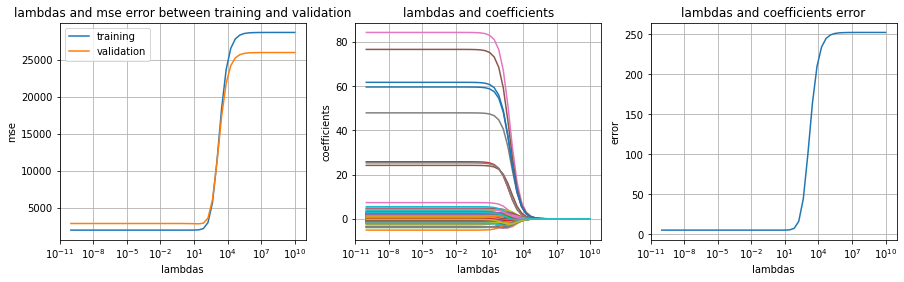

In [20]:
# Display results --> OO style subplot's'
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

#plot training and validation errors as function of lambda  
ax[0].grid()
ax[0].plot(lambdas, train_error, label="training")
ax[0].plot(lambdas, valerror_test, label="validation")
ax[0].set_xscale('log')
ax[0].set_xlabel('lambdas')
ax[0].set_ylabel('mse')
ax[0].set_title('lambdas and mse error between training and validation')
ax[0].legend()    

#coefficients can be obtained simply using model.coef_
ax[1].grid()
ax[1].plot(lambdas, model_coeff)
ax[1].set_xscale('log')
ax[1].set_xlabel('lambdas')
ax[1].set_ylabel('coefficients')
ax[1].set_title('lambdas and coefficients')

#coeffcient error can be computed using mean_squared_error(model.coef_, w)
ax[2].grid()
ax[2].plot(lambdas, coeff_error)
ax[2].set_xscale('log')
ax[2].set_xlabel('lambdas')
ax[2].set_ylabel('error')
ax[2].set_title('lambdas and coefficients error')

#### Plot 1
The first graph shows that once lambda is greater than around 10 squared, MSE values dramatically increase. This indicates that the higher the value of lambda (the more regularized the model is), the more underfitting the model is.

#### Plot 2
The bigger the value of lambda is, the less features will be considered in the model, hence, the coefficients are moving towards 0

#### Plot 3
The bigger the value of lambda is, the bigger the difference is between the new and old cofficients.

3.

implement Linear regression from scratch using 

- the closed form OLS

- the gradient descent

- (optional challenge) the closed form OLS using pseudo inverse

- LinearRegression() by sklearn. - please research which algorithm that sklearn use?

measure which one is faster, try to vary the n_features

so what do you think, closed_form or gradient descent?

use the same X y from #1

In [39]:
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
from time import time
from sklearn.linear_model import LinearRegression

def linear_regression_ols(X, y, num_feature, pseudo=False):
    X = X[:, :num_feature]
    
    #traditional OLS
    #remember that OLS has the assumption of full-column rank
    #which means the number of samples should be greater than number of features
    w = inv(X.T.dot(X)).dot(X.T).dot(y)
   
    #another way using pseudo-inverse (robust if matrix violates full-column rank)
    if(pseudo):
        #many ways to perform dot such as np.dot....you can also use @!
        w = np.dot(np.linalg.pinv(X), y)
    return w
    
def linear_regression_gradient(X, y, num_feature, max_iter=10, tol=0.0001):
    X = X[:, :num_feature]
    w = np.zeros(X.shape[1]) #+1 for intercept
    
    m = len(y)
    l_rate = 0.01 #actually need adaptive learning rate
    
    #good question is how many iteration
    #perhaps you can set a variable called tol
    #and if the mse falls in some range, its ok
    for i in range(max_iter):
        pred = get_pred(X, w)
        if (mean_squared_error(y, pred) < tol):
            break
        error = pred - y
        
        #update w by minus its partial derivates
        #if you do not add 1 for intercept, you have to do like this
#         w[0] = w[0] - ((l_rate * 1/m) * error.sum())  #remember to set w np.zeros(X.shape[1] + 1)
#         w[1:] = w[1:] - ((l_rate * 1/m) * np.dot(X.T, error))
        w = w - ((l_rate * 1/m) * np.dot(X.T, error))
    return w, i

def get_pred(X, w):
    return X @ w

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept

intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

test_num_feature = np.linspace(1, X.shape[1], 5, dtype=int)

#you probably want to write as class for below code
#way too many boiler code!
print("===Gradient Descent===")
for num_feature in test_num_feature: 
    start = time()
    w, i = linear_regression_gradient(X_train, y_train, num_feature=num_feature, max_iter=2000)
    pred = get_pred(X_test[:, :num_feature], w)
    print(f"Results finish using {i+1} iteration and {num_feature} features with MSE of " +
    f"{mean_squared_error(y_test, pred)}" + 
        f" using time of {time() - start}")

print("===OLS===")
for num_feature in test_num_feature: 
    start = time()
    w = linear_regression_ols(X_train, y_train, num_feature=num_feature)
    pred = get_pred(X_test[:, :num_feature], w)
    print(f"Results finish using {num_feature} features with MSE of " +
    f"{mean_squared_error(y_test, pred)}" + 
        f" using time of {time() - start}")
    
print("===OLS using pseudo-inverse==")
#I found pseudo-inverse to work much better than ols when full-rank assumption is violated
#for example, try make X with n_features more than n_samples...
for num_feature in test_num_feature: 
    start = time()
    w = linear_regression_ols(X_train, y_train, num_feature=num_feature, pseudo=True)
    pred = get_pred(X_test[:, :num_feature], w)
    print(f"Results finish using {num_feature} features with MSE of " +
    f"{mean_squared_error(y_test, pred)}" + 
        f" using time of {time() - start}")
    
print("===OLS using sklearn LinearRegression==")
#I found pseudo-inverse to work much better than ols when full-rank assumption is violated
#for example, try make X with n_features more than n_samples...
for num_feature in test_num_feature: 
    start = time()
    model = LinearRegression().fit(X_train[:, :num_feature], y_train)
    pred = model.predict(X_test[:, :num_feature])
    print(f"Results finish using {num_feature} features with MSE of " +
            f"{mean_squared_error(y_test, pred)}" + 
            f" using time of {time() - start}")

===Gradient Descent===
Results finish using 2000 iteration and 1 features with MSE of 95.09329835413969 using time of 0.5825450420379639
Results finish using 2000 iteration and 4 features with MSE of 76.31506985915392 using time of 0.520679235458374
Results finish using 2000 iteration and 7 features with MSE of 43.84082562600594 using time of 0.545525074005127
Results finish using 2000 iteration and 10 features with MSE of 40.972803593567 using time of 0.5176780223846436
Results finish using 2000 iteration and 13 features with MSE of 38.60443133404731 using time of 0.5504248142242432
===OLS===
Results finish using 1 features with MSE of 95.09329836069155 using time of 0.0006451606750488281
Results finish using 4 features with MSE of 76.31507513718621 using time of 0.0025081634521484375
Results finish using 7 features with MSE of 43.841022422448816 using time of 0.0008912086486816406
Results finish using 10 features with MSE of 40.93921961336292 using time of 0.0006740093231201172
Resul

As shown above, the time taken to do OLS is a lot less than that of gradient descent. 

4.

implement Ridge regression from scratch using 

 - the closed form OLS

 - stochastic gradient descent

 - SGDRegressor() of sklearn using penalty as l2

 - Ridge() by sklearn

loop through several lambda and print the MSE

compare the time as well

use the same X y from #1

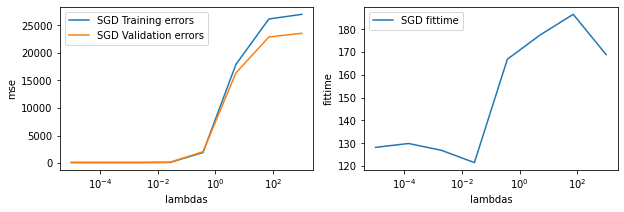

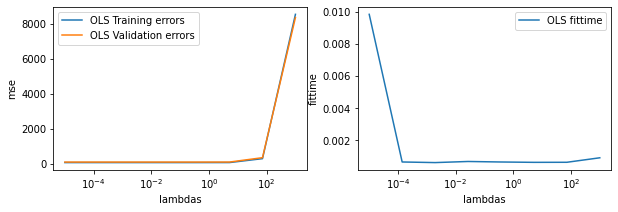

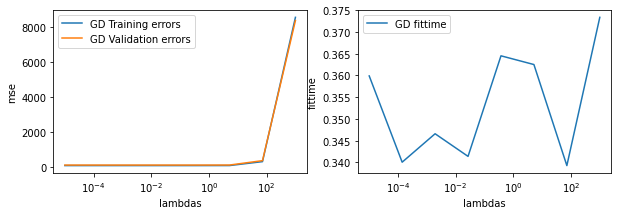

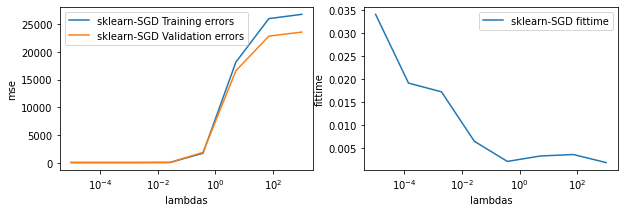

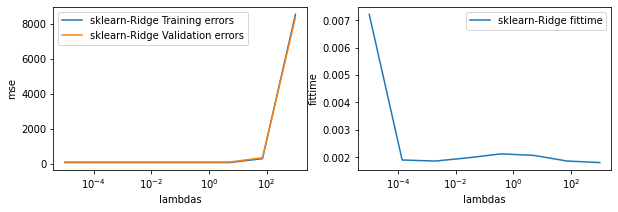

In [21]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from time import time
from sklearn.metrics import mean_squared_error

def get_pred(X, w):
    return X @ w

def ridge_ols(X, y, lamb):

    I = np.eye(X.shape[1])
    
    w = np.linalg.solve((X.T @ X) + lamb * I, X.T @ y)
    return w

def ridge_sgd(X, y, lamb, max_iter=1000, tol=0.001):
    w = np.zeros(X.shape[1])
    m = len(y)  #or X.shape[0]
    l_rate = 0.01
    for i in range(max_iter):
        for j in range(X.shape[0])
            random_row_to_pick = np.random.randint(0, X.shape[0])
            X_i = X[random_row_to_pick, :].reshape(1, X_train.shape[1])
            y_i = y[[random_row_to_pick]]
            pred = get_pred(X_i, w)
            if (mean_squared_error(y_i, pred) < tol):
                break
            error = pred - y_i
            w = w - (l_rate / m) * (np.dot(X_i.T, error) + lamb * w)
    return w

def ridge_gd(X, y, lamb, max_iter=1000, tol=0.001):
    w = np.zeros(X.shape[1])
    m = len(y)  #or X.shape[0]
    l_rate = 0.01
    for i in range(max_iter):
        pred = get_pred(X, w)
        if (mean_squared_error(y, pred) < tol):
            break
        error = pred - y
        w = w - (l_rate / m) * (np.dot(X.T, error) + lamb * w)
    return w

def plot_lambdas_mse(lambs, training_errors, validation_errors, fittime, modifier="OLS"):
    _, ax = plt.subplots(1, 2, figsize=(10, 3))
    ax[0].plot(lambs, training_errors, label=f"{modifier} Training errors")
    ax[0].plot(lambs, validation_errors, label=f"{modifier} Validation errors")
    ax[0].set_xscale('log')
    ax[0].set_xlabel("lambdas")
    ax[0].set_ylabel("mse")
    ax[0].legend()
    ax[1].plot(lambs, fittime, label=f"{modifier} fittime")
    ax[1].set_xscale('log')
    ax[1].set_xlabel("lambdas")
    ax[1].set_ylabel("fittime")
    ax[1].legend()

def apply(X_train, X_test, y_train, y_test, lamb, modifier, use_sklearn, f):
    lambs = np.logspace(-5, 3, 8)
    training_errors = []
    validation_errors = []
    fittime = []
    
    for lamb in lambs: 
        start = time()
        if not (use_sklearn):
            w = f(X_train, y_train, lamb)
            fittime.append(time() - start)
            pred = get_pred(X_train, w)
            training_errors.append(mean_squared_error(y_train, pred))
            pred = get_pred(X_test, w)
            validation_errors.append(mean_squared_error(y_test, pred))
        else:
            model = f(alpha=lamb).fit(X_train, y_train)
            fittime.append(time() - start)
            pred = model.predict(X_train)
            training_errors.append(mean_squared_error(y_train, pred))
            pred = model.predict(X_test)
            validation_errors.append(mean_squared_error(y_test, pred))
    
    plot_lambdas_mse(lambs, training_errors, validation_errors, fittime, modifier)
    
X, y, coef = make_regression(n_samples = 1000, n_features = 100, coef=True,
                         random_state=42, bias=6, noise=10, n_informative=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept

intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

models = {"SGD": ridge_sgd, "OLS": ridge_ols, "GD": ridge_gd,
                  "sklearn-SGD": SGDRegressor, "sklearn-Ridge": Ridge}
use_sklearn = [False, False, False, True, True]

for ix, (modifier, model)  in enumerate(models.items()):
    apply(X_train, X_test, y_train, y_test, 0.01, modifier, use_sklearn[ix], model)
